<a href="https://colab.research.google.com/github/yx8668/Quantconnct-AlgoTrading-Strategy/blob/main/Copy_of_Stock_price_predication_using_Python_w_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# stock price prediction using Long Short Term Memory (LSTM) 

In [11]:
#import libraries
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [12]:
#get stock quote
df = web.DataReader('GME', data_source='yahoo', start = '2015-01-01', end = '2021-04-30')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,34.160000,33.250000,34.060001,33.799999,1612700.0,25.155836
2015-01-05,34.880001,33.330002,33.520000,34.720001,4934900.0,25.840551
2015-01-06,36.029999,33.520000,35.169998,33.689999,4885100.0,25.073961
2015-01-07,34.680000,32.980000,34.290001,33.299999,2558300.0,24.783703
2015-01-08,34.169998,33.320000,33.599998,33.689999,4547400.0,25.073961
...,...,...,...,...,...,...
2021-04-26,174.679993,148.759995,150.979996,168.929993,10532100.0,168.929993
2021-04-27,188.000000,173.169998,183.550003,177.770004,8932700.0,177.770004
2021-04-28,181.979996,166.029999,172.100006,178.580002,5788900.0,178.580002


In [13]:
#show no of rows & columns
df.shape

(1593, 6)

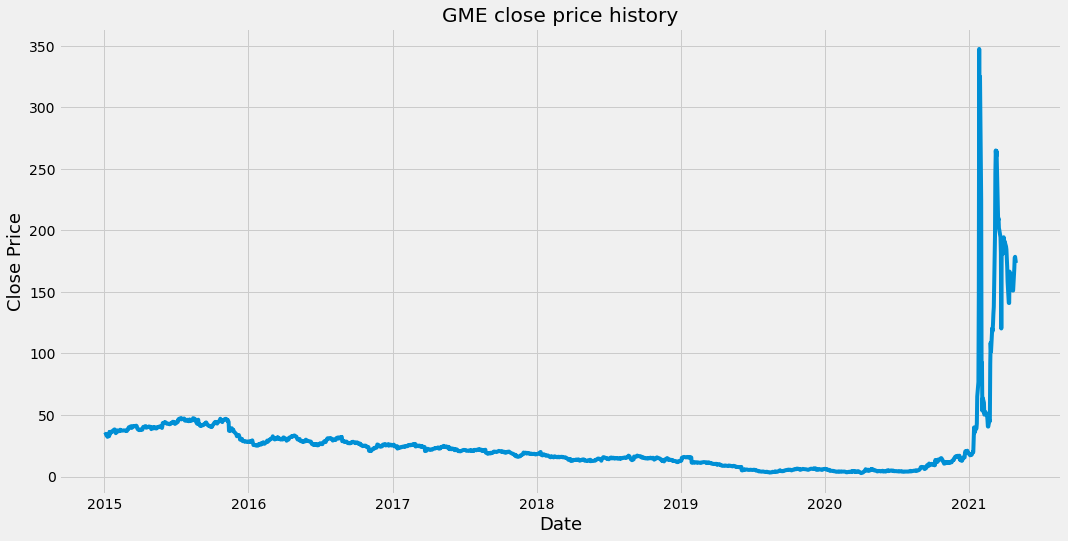

In [14]:
#plot the graph for close price history
plt.figure(figsize=(16,8))
plt.title('GME close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()


In [15]:
#new dataframe for close price only
data = df.filter(['Close'])
#convert dataframe to numpy array
dataset = data.values
#get no. of rows to train the LSTM model
train_data_len = math.ceil(len(dataset) * .85)
#show len
train_data_len

1355

In [16]:
#scale the data btw 0 & 1 (recommended process)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#show scaled data
scaled_data

array([[0.08993066],
       [0.09259958],
       [0.08961155],
       ...,
       [0.50993588],
       [0.50300252],
       [0.49545993]])

In [17]:
#create training data set
#create the scaled training data set first
train_data = scaled_data[0:train_data_len, :]
#split the data set into x_train & y_train
x_train =[]
y_train = []

#first 60 values
for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.08993066, 0.09259958, 0.08961155, 0.08848017, 0.08961155,
       0.08549215, 0.08984364, 0.08694265, 0.09692205, 0.09184531,
       0.09732818, 0.09651591, 0.09874967, 0.09956194, 0.10037423,
       0.10257898, 0.10292709, 0.10098343, 0.09709611, 0.0941371 ,
       0.09872067, 0.10066432, 0.09814047, 0.09834353, 0.09851759,
       0.09973601, 0.10223086, 0.10072234, 0.09993908, 0.10022917,
       0.10025819, 0.10066432, 0.10075135, 0.10063532, 0.10022917,
       0.09961997, 0.1000261 , 0.09930086, 0.0991268 , 0.10405848,
       0.10408749, 0.10800382, 0.1079168 , 0.10838095, 0.11032462,
       0.10980244, 0.10640828, 0.10698848, 0.10994749, 0.11107888,
       0.1105567 , 0.1111659 , 0.11020858, 0.1105857 , 0.11180412,
       0.1105567 , 0.10736561, 0.1044066 , 0.10315918, 0.10121551])]
[0.10199877616318323]

[array([0.08993066, 0.09259958, 0.08961155, 0.08848017, 0.08961155,
       0.08549215, 0.08984364, 0.08694265, 0.09692205, 0.09184531,
       0.09732818, 0.09651591, 0.09

In [18]:
#convert x_train & y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)


In [19]:
#reshape the data (from 2D to 3D) due to ML
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1295, 60, 1)

In [20]:
#create the LSTM model (the number refer to the neurons)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [21]:
#compile the model 
#add an optimizer to improve the loss function
#loss function to see how well the model did in training
model.compile(optimizer='adam', loss='mean_squared_error')



In [22]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1295/1295 [==============================] - 49s 24ms/step - loss: 1.4228e-04


In [23]:
#create the testing data set
#create a new array from 1295 to 2095
test_data = scaled_data[train_data_len-60:,:]
#create test data set for x_test & y_test
x_test = []
y_test = dataset[train_data_len:,:]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [24]:
#convert the data into numpy array
x_test = np.array(x_test)


In [25]:
#reshape the date (from 2D to 3D)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))




In [26]:
#predict the price (and unscale the data)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)




In [27]:
#get the root mean squared error (RMSE) 
#a good measure predict of how the model responsed
#use rsme to evaluate the model
rmse = np.sqrt ( np.mean (predictions - y_test) ** 2)
rmse



4.4829888584233135

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


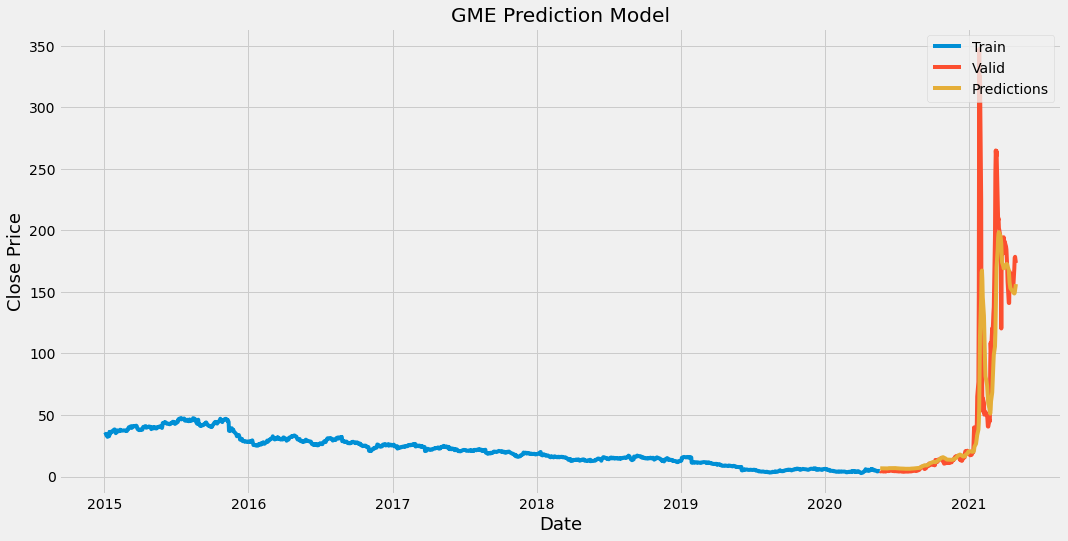

In [28]:
#plot the graph
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions
#visualize of data
plt.figure(figsize=(16,8))
plt.title('GME Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'], loc='upper right')
plt.show()



In [29]:
#show the actual and predicted price in table format
valid



,Close,Predictions
Date,,
2020-05-21,4.440000,6.724717
2020-05-22,4.180000,6.700778
2020-05-26,4.420000,6.660104
2020-05-27,4.690000,6.637677
2020-05-28,4.330000,6.651681
...,...,...
2021-04-26,168.929993,148.740799
2021-04-27,177.770004,149.325775
2021-04-28,178.580002,151.402893


In [46]:
#get the quote
gme_quote = web.DataReader('GME', data_source='yahoo', start='2015-01-01', end='2021-05-27')
#create new DF
new_df = gme_quote.filter(['Close'])
#get last 90days close price and convert to array
last_90_days = new_df[-90:].values
#scale the date btw 0 & 1
last_90_days_scaled = scaler.transform(last_90_days)
#create an empty list
X_test = []
#Append the last 60days
X_test.append(last_90_days_scaled)
#Convert X_test data into numpy array
X_test = np.array(X_test)
#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled priceKH
predict_price = model.predict(X_test)
#unscale the data
predict_price = scaler.inverse_transform(predict_price)
print (predict_price)



[[182.07928]]


In [47]:
#get the quote
gme_quote2 = web.DataReader('GME', data_source='yahoo', start='2021-05-28', end='2021-05-28')
print(gme_quote2['Close'])





Date
2021-05-27    254.130005
Name: Close, dtype: float64
